In [1]:
import os
import copy
import numpy as np
import pandas as pd
from PIL import Image

class ImageConcat:
    def __init__(self, n_h, n_v, resolution=1000):
        self.n_h = n_h
        self.n_v = n_v
        self.r = resolution
        self.img = Image.new("L", (self.n_h*self.r, self.n_v*self.r), color=255)# color=(255,255,255))
        self.cursor = [0,0]
        self.max_h = 0
    
    def move_cursor_h(self, r):
        self.cursor[0] += r
        if self.cursor[0] > self.max_h:
            self.max_h = copy.deepcopy(self.cursor[0])
        
    def move_cursor_v(self):
        self.cursor[1] += self.r
        
    def reset_cursor_h(self):
        self.cursor[0] = 0
        
    def append_img(self, path, cut_margin=True, clip_white=False):
        try:
            img = Image.open(path).convert('L').resize((self.r,self.r), Image.BILINEAR)
            if cut_margin:
                img = self.cut_margin(img, clip_white=clip_white)
            self.img.paste(img, tuple(self.cursor))
            return img.size
        except:
            # print(f"Not Appended: {path}")
            return None
        
    def add_letter(self, path, cut_margin=True, clip_white=False):
        imgsize = self.append_img(path, cut_margin=cut_margin, clip_white=clip_white)
        if imgsize is None:
            self.move_cursor_h(self.r)
        else:
            self.move_cursor_h(imgsize[0])
    
    def add_space(self):
        self.move_cursor_h(int(self.r/3))
        
    def enter(self):
        self.move_cursor_v()
        self.reset_cursor_h()
        
    def cut_margin(self, img, clip_white):
        npimg = 255 - np.array(img)
        if clip_white:
            npimg[np.where(npimg<10)] = 0 
        wmin = npimg.sum(0).nonzero()[0].min()
        wmax = npimg.sum(0).nonzero()[0].max()
        # hmin = npimg.sum(1).nonzero()[0].min()
        # hmax = npimg.sum(1).nonzero()[0].max()

        npimg = 255 - npimg[:,wmin:wmax+1]
        img = Image.fromarray(npimg)
        return img


In [4]:
def get_all_korean():

    def nextKorLetterFrom(letter):
        lastLetterInt = 15572643
        if not letter:
            return '가'
        a = letter
        b = a.encode('utf8')
        c = int(b.hex(), 16)

        if c == lastLetterInt:
            return False

        d = hex(c + 1)
        e = bytearray.fromhex(d[2:])

        flag = True
        while flag:
            try:
                r = e.decode('utf-8')
                flag = False
            except UnicodeDecodeError:
                c = c+1
                d = hex(c)
                e = bytearray.fromhex(d[2:])
        return e.decode()

    returns = []
    flag = True
    k = ''
    while flag:
        k = nextKorLetterFrom(k)
        if k is False:
            flag = False
        else:
            returns.append(k)
    return returns


mapper = {}
for letter in get_all_korean():
    ch1 = (ord(letter) - ord('가'))//588
    ch2 = ((ord(letter) - ord('가')) - (588*ch1)) // 28
    ch3 = (ord(letter) - ord('가')) - (588*ch1) - 28*ch2
    mapper[(ch1, ch2, ch3)] = letter
    
def target_letters(letter, mapper, replacing_order=2):
    hlist = [0,1,2,3,4,5,6,7,20] # ㅏㅐㅑㅒㅓㅔㅕㅖㅣ
    vlist = [8,12,13,17,18] # ㅗㅛㅜㅠㅡ
    clist = [9,10,11,14,15,16,19] # ㅘㅙㅚㅝㅞㅟㅢ
    
    ch1 = (ord(letter) - ord('가'))//588
    ch2 = ((ord(letter) - ord('가')) - (588*ch1)) // 28
    ch3 = (ord(letter) - ord('가')) - (588*ch1) - 28*ch2
    
    if ch2 in hlist:
        targets = [mapper[(ch1,l2,ch3)] for l2 in hlist if l2 != ch2] 
    elif ch2 in vlist:
        targets = [mapper[(ch1,l2,ch3)] for l2 in vlist if l2 != ch2] 
    else:
        targets = [mapper[(ch1,l2,ch3)] for l2 in clist if l2 != ch2] 
    return targets

In [5]:
ofd = "/home/jupyter/ai_font/data/exp0809/inpaint0814"
tfd = "/home/jupyter/ai_font/data/exp0809/inpaint0814_generated"

In [7]:
letters = [f.split(".")[0] for f in os.listdir(ofd) if ("_m" not in f) & (f.endswith(".png"))]
img = ImageConcat(n_h=10, n_v=len(letters), resolution=96)

In [10]:
for origin_letter in letters:
    tetters = target_letters(origin_letter, mapper)
    img.add_letter(path=f"{ofd}/{origin_letter}.png", cut_margin=False)
    img.add_space()
    for target_letter in tetters:
        img.add_letter(path=f"{tfd}/{target_letter}.png", cut_margin=False)
    img.enter()

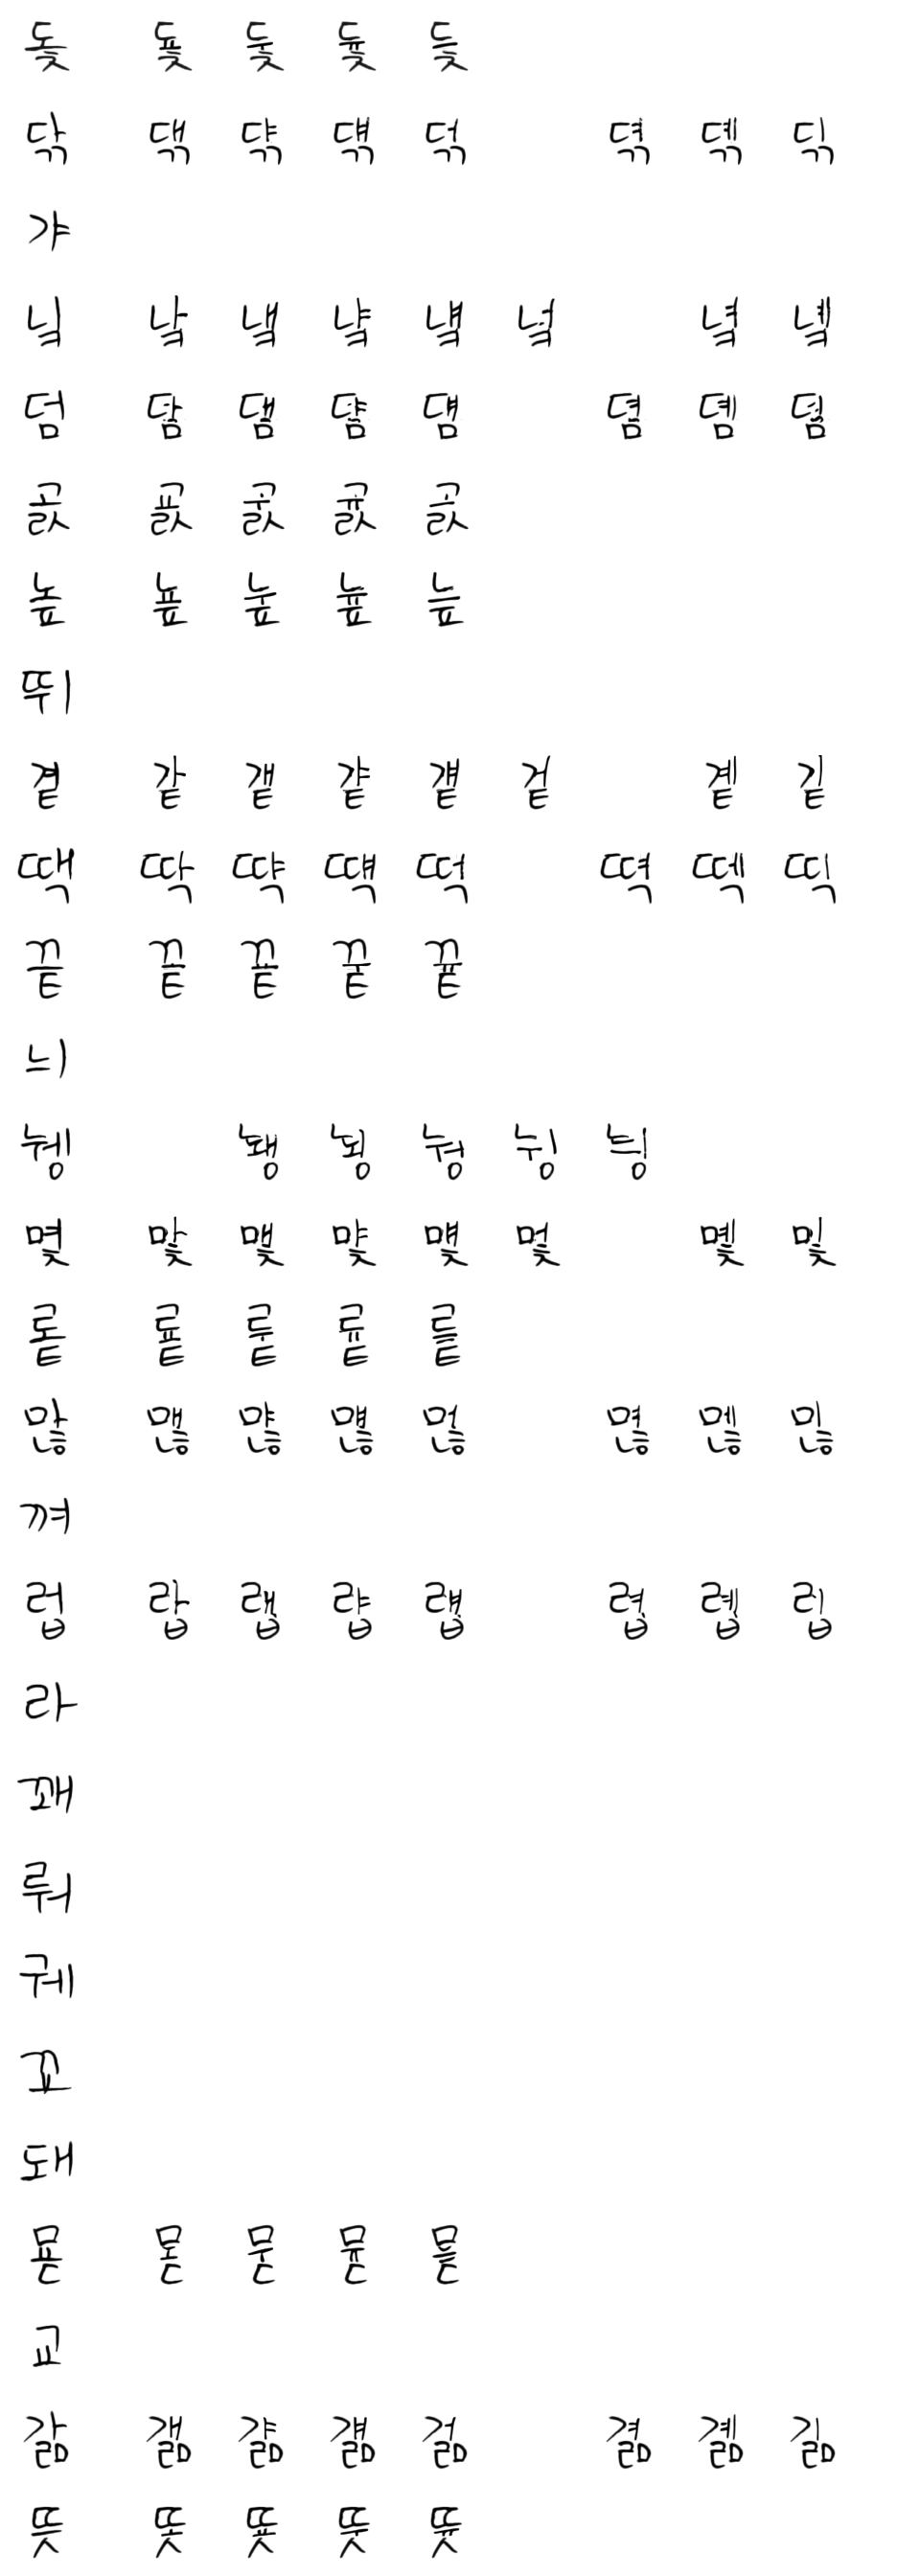

In [11]:
img.img

In [3]:
os.listdir(fd)

['뇡.png',
 '멏.png',
 '긺.png',
 '뗙.png',
 '댞.png',
 '뜟.png',
 '.ipynb_checkpoints',
 '뤁.png',
 '낰.png',
 '륱.png',
 '몯.png',
 '띡.png',
 '꿑.png',
 '녴.png',
 '굸.png',
 '냌.png',
 '녘.png',
 '걞.png',
 '듗.png',
 '랩.png',
 '댬.png',
 '둋.png',
 '뚓.png',
 '늎.png',
 '땩.png',
 '덖.png',
 '같.png',
 '갦.png',
 '넠.png',
 '걺.png',
 '렵.png',
 '깉.png',
 '겉.png',
 '갵.png',
 '닁.png',
 '뚯.png',
 '곎.png',
 '떅.png',
 '끁.png',
 '뉭.png',
 '룥.png',
 '떡.png',
 '릍.png',
 '굜.png',
 '귨.png',
 '넄.png',
 '럡.png',
 '딤.png',
 '맻.png',
 '믾.png',
 '몒.png',
 '덈.png',
 '늪.png',
 '뎎.png',
 '및.png',
 '딱.png',
 '먗.png',
 '눞.png',
 '뎪.png',
 '듳.png',
 '댂.png',
 '먆.png',
 '맪.png',
 '멶.png',
 '딖.png',
 '롑.png',
 '믇.png',
 '꾵.png',
 '걑.png',
 '댺.png',
 '랍.png',
 '뎸.png',
 '담.png',
 '립.png',
 '겲.png',
 '눵.png',
 '댐.png',
 '똣.png',
 '꽅.png',
 '뎜.png',
 '뗵.png',
 '몣.png',
 '걂.png',
 '뮫.png',
 '곝.png',
 '걭.png',
 '럅.png',
 '묻.png',
 '뇅.png',
 '둧.png',
 '눂.png',
 '먢.png',
 '맟.png',
 '먾.png',
 '긄.png',
 '냨.png',
 '먳.png']